# **Práctica 1**

En esta práctica aprenderemos como entrenar una red neuronal que nos prediga el precio que va a tener un teléfono móvil a partir de un [histórico de datos](https://www.kaggle.com/iabhishekofficial/mobile-price-classification). En esta sesión aprenderemos:

1.   Cargar los datos.
2.   Preprocesar los datos.
3.   Definir una architectura de red.
4.   Seleccionar la función de coste y el optimizador.
5.   Entrenar la red.



# 1. Cargado de los datos

In [3]:
!mkdir ./data
!gdown --id '1bPlhboKnW3DjJj43-I_rqOHE7XW6_wTG'
!gdown --id '1Nh4oNMXfiM5ySEpsSJcmPolbWvw1UW-6'
!mv /content/train.csv ./data
!mv /content/test.csv ./data

mkdir: cannot create directory ‘./data’: File exists
Downloading...
From: https://drive.google.com/uc?id=1bPlhboKnW3DjJj43-I_rqOHE7XW6_wTG
To: /content/train.csv
100% 122k/122k [00:00<00:00, 8.50MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Nh4oNMXfiM5ySEpsSJcmPolbWvw1UW-6
To: /content/test.csv
100% 63.9k/63.9k [00:00<00:00, 11.6MB/s]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
ls ./data

test.csv  train.csv


In [6]:
# Importamos dependencias
import numpy as np
import pandas as pd

In [7]:
# Cargamos el conjunto de datos de entrenamiento
datos = pd.read_csv('./data/train.csv')

In [8]:
# Visualizamos tamaño
# 2000 muestras de entrenamiento
# 20 variables + 1 objetivo (price_range)
datos.shape

(2000, 21)

In [9]:
# Visualizamos las variables
datos.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
# Mostramos las primeras 10 muestras
datos.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


# 2. Preprocesado de los datos

In [11]:
# Importamos dependencias preprocesado
from sklearn.preprocessing import StandardScaler # Normalización datos para que estén en la misma escala
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [12]:
# Diferenciamos variables entrada de variable de salida
salida = datos['price_range']
datos.pop('price_range')

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [13]:
# Vemos tamaños de los datos
print('Tamaño datos entrada: ', datos.shape)
print('Tamaño variable salida: ', salida.shape)

Tamaño datos entrada:  (2000, 20)
Tamaño variable salida:  (2000,)


In [14]:
# Convertimos DataFrame a Numpy
X = datos.values
y = salida.values
print(y.shape)
y = np.reshape(y, (y.shape[0], 1))
print(y.shape)

(2000,)
(2000, 1)


In [15]:
# Vemos cómo se han convertido los formatos de datos y qué tamaño tienen 
# nuestros datos
print('Tipo dato anterior: ', type(datos))
print('Tipo dato nuevo: ', type(X))

Tipo dato anterior:  <class 'pandas.core.frame.DataFrame'>
Tipo dato nuevo:  <class 'numpy.ndarray'>


In [16]:
# Normalizamos los datos de entrada (z-score). Evitamos que prioricen las variables con un valor mayor.
sc = StandardScaler()  #inicializar el normalizador.
sc.fit(X)  #calcula media y desviación estándar (ajustamos a mis datos)
X_norm = sc.transform(X)  #aplicamos la normalización.

In [17]:
# Vemos los datos antes y después de la normalización
print("Battery power antes de la normalización: ")
print(X[0,:])
print("Battery power después de la normalización: ")
print(X_norm[0,:])

Battery power antes de la normalización: 
[8.420e+02 0.000e+00 2.200e+00 0.000e+00 1.000e+00 0.000e+00 7.000e+00
 6.000e-01 1.880e+02 2.000e+00 2.000e+00 2.000e+01 7.560e+02 2.549e+03
 9.000e+00 7.000e+00 1.900e+01 0.000e+00 0.000e+00 1.000e+00]
Battery power después de la normalización: 
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]


In [18]:
# Vemos que tras la normalización las variables están en el mismo rango y 
# evitamos que unas tengan más peso que otras.
print("Battery power antes de la normalización: ")
print(X[:,0])
print("Battery power después de la normalización: ")
print(X_norm[:,0])

print("Clock speed antes de la normalización: ")
print(X[:,2])
print("Clock speed después de la normalización: ")
print(X_norm[:,2])

Battery power antes de la normalización: 
[ 842. 1021.  563. ... 1911. 1512.  510.]
Battery power después de la normalización: 
[-0.90259726 -0.49513857 -1.5376865  ...  1.53077336  0.62252745
 -1.65833069]
Clock speed antes de la normalización: 
[2.2 0.5 0.5 ... 0.9 0.9 2. ]
Clock speed después de la normalización: 
[ 0.83077942 -1.2530642  -1.2530642  ... -0.76274805 -0.76274805
  0.58562134]


In [19]:
# Codificación one-hot de la variable de salida
print("Valores variable de salida: ", np.unique(y))
onehot_enc = OneHotEncoder()
y_onehot = onehot_enc.fit_transform(y).toarray()
print("Valor antes de la codificación: ", y[0])
print("Valor después de la codificación: ", y_onehot[0])

Valores variable de salida:  [0 1 2 3]
Valor antes de la codificación:  [1]
Valor después de la codificación:  [0. 1. 0. 0.]


In [20]:
# Dividimos nuestro conjunto de datos en entrenamiento y validación
X_train, X_testval, y_train, y_testval = train_test_split(X_norm, y_onehot, 
                                                          test_size=0.2)     #porcentaje de test

In [21]:
# Vemos el tamaño de las particiones
print("Tamaño datos de entrada entrenamiento: ", X_train.shape)
print("Tamaño salida entrenamiento: ", y_train.shape)
print("Tamaño datos de entrada validación/test: ", X_testval.shape)
print("Tamaño salida validación/test: ", y_testval.shape)

Tamaño datos de entrada entrenamiento:  (1600, 20)
Tamaño salida entrenamiento:  (1600, 4)
Tamaño datos de entrada validación/test:  (400, 20)
Tamaño salida validación/test:  (400, 4)


In [22]:
# Dividimos nuestro conjunto de datos de validacion en test y validación
X_val, X_test, y_val, y_test = train_test_split(X_testval, y_testval, 
                                                  test_size=0.5)

In [23]:
# Vemos el tamaño de las nuevas particiones
print("Tamaño datos de entrada validación: ", X_val.shape)
print("Tamaño salida validación: ", y_val.shape)
print("Tamaño datos de entrada test: ", X_test.shape)
print("Tamaño salida test: ", y_test.shape)

Tamaño datos de entrada validación:  (200, 20)
Tamaño salida validación:  (200, 4)
Tamaño datos de entrada test:  (200, 20)
Tamaño salida test:  (200, 4)


# 3. Definición de la arquitectura de la Red Neuronal

In [24]:
# Importamos dependencias
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense # Capa totalmente conectada

from tensorflow.keras.utils import plot_model

In [25]:
np.random.seed(5)
tf.random.set_seed(5)

In [26]:
# Definimos arquitectura
model = Sequential()
# Capa de entrada: X_train.shape[1], numero de variables
model.add(Input(shape=(X_train.shape[1],)))
# Capas ocultas. 2 capas ocultas con 16 y 12 nodos respectivamente
model.add(Dense(16, activation='relu'))    #utilizamos prácticamente siempre relu como función de activación.
model.add(Dense(12, activation='relu'))
# Capa de salida. 4 clases - Clasificación multiclase
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


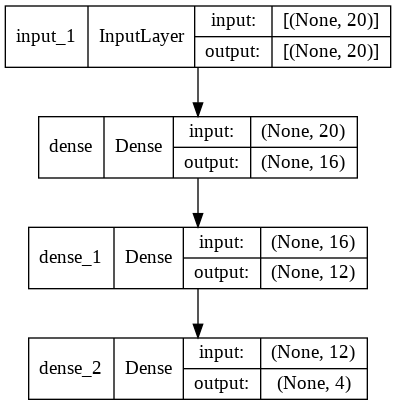

In [30]:
plot_model(model, show_shapes=True, show_layer_names=True,  to_file='model_1.png')

In [31]:
!mv model_1.png './drive/MyDrive/Colab Notebooks/21-22/modelos'

Número de parámetros a ajustar por capa: **número_entrada * número_neuronas**. Ejemplo:

dense = (n_entradas + 1) * n_neuronas = (20 + 1) * 16 = 336

(+1 del bias)



# 4. Definición de la función de pérdidas y el optimizador

In [33]:
# Función de pérdidas: clasificación -> entropía cruzada.
# Optimizador: tasa de aprendizaje adaptativa -> optimizador Adam.
# Métricas: estadísticos que queremos que se calculen tras cada iteración 
# para evaluar el rendimiento de la red.
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

# 5. Entrenamiento

In [34]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 1.4418 - accuracy: 0.2212 - val_loss: 1.4692 - val_accuracy: 0.1800
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 1.3981 - accuracy: 0.2681 - val_loss: 1.4332 - val_accuracy: 0.2200
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3654 - accuracy: 0.3237 - val_loss: 1.4002 - val_accuracy: 0.2600
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1.3329 - accuracy: 0.3731 - val_loss: 1.3659 - val_accuracy: 0.3050
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2948 - accuracy: 0.4056 - val_loss: 1.3263 - val_accuracy: 0.3650
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 1.2483 - accuracy: 0.4412 - val_loss: 1.2726 - val_accuracy: 0.3900
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 1.1887 - accuracy: 0.4719 - val_loss: 1.2024 - val_accuracy: 0.4450
Epoch 8/100


Cosas a observar:

*   Métricas entrenamiento
*   Métricas validación
*   ¿Sobreajuste?   (por ejemplo con un 99% de precisión en entrenamiento y un 30% en validación)



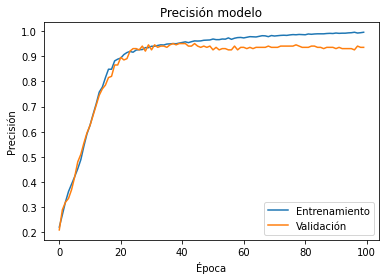

In [ ]:
# Visualizamos la precisión
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc="lower right")
plt.show()

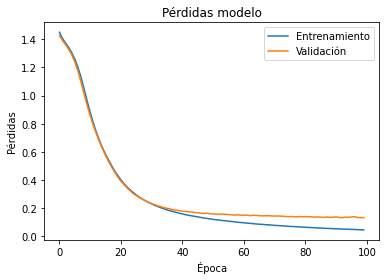

In [ ]:
# Visualizamos pérdidas
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdidas modelo')
plt.ylabel('Pérdidas')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc="upper right")
plt.show()

In [ ]:
# Guardamos el modelo
from pathlib import Path
path_modelos = Path('./drive/MyDrive/Colab Notebooks/21-22/modelos')
path_modelos.mkdir(exist_ok=True)
model.save(path_modelos / 'model_1.h5')   #crea mi archivo de parámetros.

In [37]:
# Evaluamos el modelo
metrics_evaluation = model.evaluate(X_test, y_test, verbose=0)
print('Exactitud test: ', metrics_evaluation[1])

Exactitud test:  0.9549999833106995


# 6. Uso del modelo entrenado sobre los datos de test

Mediante el conjunto de datos de entrenamiento/validación hacemos el entrenamiento de la red y la selección de los hiperparámetros óptimos. Sin embargo, para conocer el rendimiento real del modelo entrenado debemos evaluarlo empleando un nuevo conjunto de datos, los datos de test.


In [38]:
# Cargamos los datos de test
data_test = pd.read_csv('./data/test.csv')

In [39]:
# Mostramos tamaño datos y nombre variables
print(data_test.shape)
print(data_test.columns)

(1000, 21)
Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


ATENCIÓN: Variable ID no se encuentra en el set de entrenamiento. Debemos eliminarla

In [40]:
# Primeras filas
data_test.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
5,6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
6,7,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
7,8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1
8,9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0
9,10,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1


In [41]:
# Eliminamos columna id
data_test.pop('id')
print(data_test.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [42]:
# Convertimos DataFrame a Numpy
data_test = data_test.values
print(type(data_test))

<class 'numpy.ndarray'>


In [43]:
# Normalizamos datos de test. 
# IMPORTANTE: Normalizamos datos con media y std aprendidas del set de entrenamiento.
data_norm = sc.transform(data_test)
print('Datos antes de normalizar: ')
print(data_test)
print('Datos después de normalizar')
print(data_norm)

Datos antes de normalizar: 
[[1.043e+03 1.000e+00 1.800e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [8.410e+02 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.807e+03 1.000e+00 2.800e+00 ... 0.000e+00 1.000e+00 1.000e+00]
 ...
 [1.185e+03 0.000e+00 1.400e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.533e+03 1.000e+00 5.000e-01 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.270e+03 1.000e+00 5.000e-01 ... 1.000e+00 0.000e+00 1.000e+00]]
Datos después de normalizar
[[-0.44505984  1.0100505   0.34046327 ... -1.78686097  0.99401789
  -1.01409939]
 [-0.90487356  1.0100505  -1.2530642  ...  0.55964063 -1.00601811
  -1.01409939]
 [ 1.29403758  1.0100505   1.56625363 ... -1.78686097  0.99401789
   0.98609664]
 ...
 [-0.12182446 -0.9900495  -0.14985287 ...  0.55964063 -1.00601811
  -1.01409939]
 [ 0.67032987  1.0100505  -1.2530642  ... -1.78686097  0.99401789
  -1.01409939]
 [ 0.07166151  1.0100505  -1.2530642  ...  0.55964063 -1.00601811
   0.98609664]]


In [ ]:
# Cargamos modelo generado anteriormente
from tensorflow.keras.models import load_model
model = load_model('./drive/MyDrive/Colab Notebooks/21-22/modelos/model_1.h5')

In [44]:
# Realizamos predicciones
predicciones = model.predict(data_norm)

In [45]:
# Visualizamos predicciones
print(predicciones)

[[2.3740397e-20 8.6904251e-08 7.5303215e-01 2.4696778e-01]
 [1.0844399e-26 2.3954575e-12 1.9137557e-03 9.9808621e-01]
 [1.1657741e-16 1.2739365e-06 9.6169490e-01 3.8303874e-02]
 ...
 [5.7280874e-01 4.2719120e-01 3.6174437e-09 3.6168492e-17]
 [4.9027644e-08 1.9522183e-02 9.7999406e-01 4.8360002e-04]
 [1.5410045e-16 2.6510199e-05 9.9993992e-01 3.3654906e-05]]


In [46]:
# Visualizamos predicciones de una predicción (del primer registro)  Codificada con OneHot 0,1,2,3
print(predicciones[0,:])

[2.3740397e-20 8.6904251e-08 7.5303215e-01 2.4696778e-01]


In [47]:
# Convertimos probabilidad en clase final. Nos quedamos con el indice de la clase de mayor probabilidad
predicciones_clase = np.argmax(predicciones, axis=1)

In [51]:
predicciones_clase.shape

(1000,)

In [ ]:
# Visualizamos predicciones
print(predicciones_clase)

[2 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 2 1 3 2 1 3 1 1 3 0 2 0 2 0 2 0 3 0 1 1 3
 1 2 1 1 2 0 0 0 0 0 3 1 2 1 0 3 0 3 0 3 1 1 3 3 2 0 1 1 1 1 3 1 2 1 2 2 3
 3 0 2 0 2 3 0 3 3 0 3 0 3 1 3 0 1 2 2 1 2 2 1 2 1 2 1 0 0 3 0 2 1 1 2 3 3
 3 1 3 3 3 3 2 3 0 0 2 2 1 2 0 3 2 3 2 0 2 1 1 3 1 1 0 3 2 1 2 1 2 2 3 3 3
 2 3 2 3 1 0 3 2 3 3 3 3 3 2 3 3 3 3 1 0 3 0 0 0 1 1 0 1 0 0 1 2 1 0 0 1 1
 2 2 1 0 0 0 1 0 3 1 0 2 2 2 3 1 1 3 2 3 2 2 1 0 0 1 3 0 3 3 3 0 2 0 3 2 3
 3 1 0 1 0 3 0 1 0 2 2 1 3 0 2 0 3 1 2 0 0 2 1 2 3 3 1 1 3 0 0 2 3 3 1 3 1
 1 3 2 1 2 3 3 3 1 0 0 2 3 1 1 3 2 0 3 0 1 2 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1
 1 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 0 3 0 0 0 1 3 2 0 0 0 3 2 0 2 3 0
 2 2 2 3 1 3 3 2 2 2 3 3 0 3 0 3 1 3 1 2 3 0 1 1 3 1 3 2 3 0 0 0 0 2 0 0 2
 2 0 2 2 2 0 1 0 0 3 3 0 3 1 2 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 0 0 1 0 0 1
 1 0 0 1 2 2 3 2 3 0 3 0 3 0 1 1 1 2 0 3 2 3 3 1 3 1 3 1 2 2 0 1 1 1 1 0 0
 0 1 2 0 0 3 2 0 2 3 0 0 3 1 2 1 2 2 3 0 3 0 2 3 2 3 0 2 0 2 3 0 1 2 0 0 1
 1 1 3 3 3 1 3 1 2 2 3 3 

# Ejercicio 1. Entrenamiento sin normalizar los datos

In [ ]:
# Preparamos las particiones
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(
    X, y_onehot, test_size=0.2)

In [ ]:
# Entrenamiento
history_no_norm = model.fit(X_train_2, y_train_2, epochs=100, batch_size=64,
                            validation_data=(X_val_2, y_val_2))

Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 16235.1504 - accuracy: 0.2469 - val_loss: 8585.2783 - val_accuracy: 0.2525
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 5882.3726 - accuracy: 0.2194 - val_loss: 3858.5637 - val_accuracy: 0.1825
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 2738.2275 - accuracy: 0.2419 - val_loss: 1621.6830 - val_accuracy: 0.2600
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1024.6997 - accuracy: 0.3725 - val_loss: 561.4246 - val_accuracy: 0.4825
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 476.2360 - accuracy: 0.5025 - val_loss: 374.1880 - val_accuracy: 0.5175
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 343.5874 - accuracy: 0.5094 - val_loss: 278.8439 - val_accuracy: 0.5050
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 263.9250 - accuracy: 0.5069 - val_loss: 210.6017 

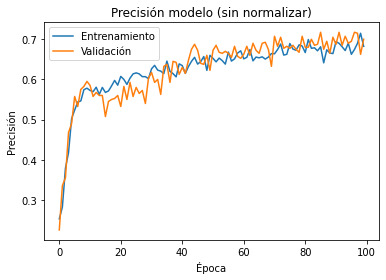

In [ ]:
# Visualizamos la precisión
plt.plot(history_no_norm.history['accuracy'])
plt.plot(history_no_norm.history['val_accuracy'])
plt.title('Exactitud modelo (sin normalizar)')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc="upper left")
plt.show()

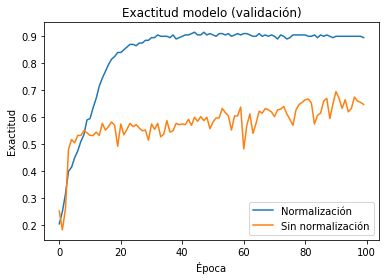

In [ ]:
# Comparamos la precisión
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history_no_norm.history['val_accuracy'])
plt.title('Exactitud modelo (validación)')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Normalización', 'Sin normalización'], loc="lower right")
plt.show()

Podemos observar que sin normalizar los datos se obtiene menor precisión en la predicción.
Es inestable, en validación.
<P>**MUY IMPORTANTE NORMALIZAR LOS DATOS**.

# Ejercicio 2: Arquitectura menos compleja
En este ejercicio vamos a comprobar como se comporta el modo si reducimos la complejidad del modelo. Esto se puede realizar de dos formas distintas:


1.   Reduciendo el número de capas ocultas. ((de dos capas a 1)). Ej.: [20,16,12,4]  [20,12,4]
2.   Reduciendo el número de neuronas por capa.



In [ ]:
# Eliminamos una de las capas ocultas:
model_2 = Sequential()
model_2.add(Input(shape=(X_train.shape[1],)))
model_2.add(Dense(12, activation='relu'))
model_2.add(Dense(4, activation='softmax'))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 12)                252       
                                                                 
 dense_6 (Dense)             (None, 4)                 52        
                                                                 
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilamos y entrenamos
model_2.compile(loss="categorical_crossentropy", optimizer="adam",
                metrics=["accuracy"])
history_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=64, 
                        validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 1.6871 - accuracy: 0.2731 - val_loss: 1.5810 - val_accuracy: 0.3050
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.5776 - accuracy: 0.2887 - val_loss: 1.4917 - val_accuracy: 0.3150
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4925 - accuracy: 0.3119 - val_loss: 1.4239 - val_accuracy: 0.3250
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4252 - accuracy: 0.3444 - val_loss: 1.3669 - val_accuracy: 0.3500
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3672 - accuracy: 0.3819 - val_loss: 1.3178 - val_accuracy: 0.3700
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3151 - accuracy: 0.4031 - val_loss: 1.2727 - val_accuracy: 0.4100
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2665 - accuracy: 0.4319 - val_loss: 1.2294 - val_accuracy: 0.4500
Epoch 8/100
2

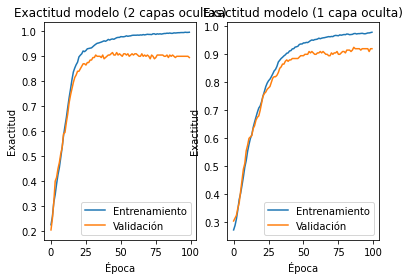

In [ ]:
# Visualizamos la precisión
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud modelo (2 capas ocultas)')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc="lower right")

plt.subplot(122)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Exactitud modelo (1 capa oculta)')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc="lower right")
plt.show()

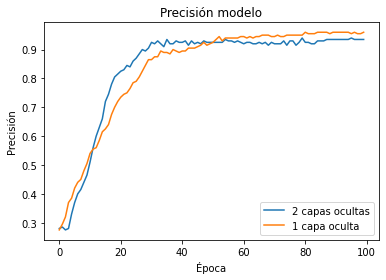

In [ ]:
# Comparamos el rendimiento de ambos modelo sobre el conjunto de validación
plt.plot(history.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Precisión modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['2 capas ocultas', '1 capa oculta'], loc="lower right")
plt.show()

In [ ]:
# Analizamos resultados sobre el conjunto de test
metrics_evaluation_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Exactitud test actual: ', metrics_evaluation_2[1])
print('Exactitud test anterior: ', metrics_evaluation[1])

Precisión test actual:  0.9700000286102295
Precisión test anterior:  0.9449999928474426


Podemos observar que tras disminuir la complejidad de la red se han producido dos efectos:


1.   Se ha reducido el sobreajuste (menor diferencia entre la precisión sobre el conjunto de datos de entrenamento y el conjunto de datos de validación).
2.   Se ha aumentado la precisión sobre el conjunto de datos de validación y test.


((No hacen falta modelos complejos))
((Necesito más épocas)).


# Ejercicio 3: Arquitectura más compleja
En este ejercicio vamos a ver cómo afecta al rendimiento de la red aumentar la complejidad de la red. Esto se puede realizar de dos formas distintas:


1.   Aumentando el número de capas ocultas.
2.   Aumentando el número de neuronas por capa. ((100 y 70 neuronas))



In [ ]:
# Aumentamos el número de neuronas en las capas
model_3 = Sequential()
model_3.add(Input(shape=(X_train.shape[1],)))
model_3.add(Dense(100, activation='relu'))
model_3.add(Dense(70, activation='relu'))
model_3.add(Dense(4, activation='softmax'))
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               2100      
                                                                 
 dense_8 (Dense)             (None, 70)                7070      
                                                                 
 dense_9 (Dense)             (None, 4)                 284       
                                                                 
Total params: 9,454
Trainable params: 9,454
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilamos y entrenamos
model_3.compile(loss="categorical_crossentropy", optimizer="adam",
                metrics=["accuracy"])
history_3 = model_3.fit(X_train, y_train, epochs=100, batch_size=64, 
                        validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.3132 - accuracy: 0.3694 - val_loss: 1.1855 - val_accuracy: 0.5050
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.0449 - accuracy: 0.6006 - val_loss: 0.9382 - val_accuracy: 0.6100
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7951 - accuracy: 0.7144 - val_loss: 0.7277 - val_accuracy: 0.7300
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6022 - accuracy: 0.8263 - val_loss: 0.5909 - val_accuracy: 0.7600
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.8794 - val_loss: 0.4870 - val_accuracy: 0.8200
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3771 - accuracy: 0.9044 - val_loss: 0.4161 - val_accuracy: 0.8450
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3118 - accuracy: 0.9281 - val_loss: 0.3732 - val_accuracy: 0.8450
Epoch 8/100


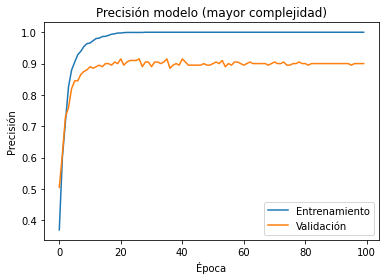

In [ ]:
# Visualizamos la precisión
import matplotlib.pyplot as plt
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Precisión modelo (mayor complejidad)')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc="lower right")
plt.show()

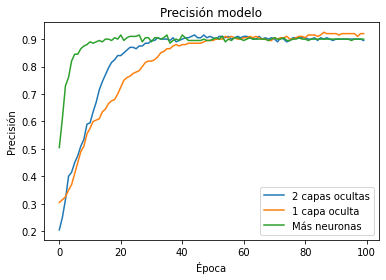

In [ ]:
# Comparamos el rendimiento de los modelos sobre el conjunto de validación
plt.plot(history.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Precisión modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['2 capas ocultas', '1 capa oculta', 'Más neuronas'], 
           loc="lower right")
plt.show()

Conseguimos una convergencia más rápida. Resultados en validación similares a los obtenidos con el modelo más simple (1 capa oculta). Más sobreajuste. Sobreajuste muy grande.
En entrenamiento, tenemos una precisión perfecta, pero en validación disminuye.
((En menos épocas alcanza mucha precisión. Pero sobreajusta muy rápido. Igual parar el entrenamiento muy rápido (earlystoping). "forzar 4 o 5 iteraciones", pero ver cómo funciona en "test")).

# Ejercicio 4: Tasa de aprendizaje
En todos los ejemplos hasta ahora hemos empleado una tasa de aprendizaje variable a través del optimizador Adam. En este ejercicio vamos a evaluar el rendimiento de la red empleando distintas tasas de aprendizaje.


1.   Tasa de aprendizaje constante elevada.  (1)
2.   Tasa de aprendizaje constante media.  (0.01)
3.   Tasa de aprendizaje constante pequeña.  (1e-5)
4.   Planificador de tasa de aprendizaje (RMSProp, Adam, Adagrad y Adadelta).
  * optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
  * optimizer = Adagrad(learning_rate=0.01, epsilon=1e-08, decay=0.0)
  * optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
  * optimizer = Adadelta(learning_rate=1.0, rho=0.95, epsilon=1e-08, decay=0.0)


NOTA: Para la tasa de aprendizaje constante se empleará el optimizador de descenso de gradiente estocástico (SGD).


[<--Más Info_Web-->](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)


In [ ]:
# Ya que lo vamos a emplear múltiples veces vamos a crear un método para definir 
# la arquitectura base
def get_model():
  model = Sequential()
  model.add(Input(shape=(X_train.shape[1],)))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  return model

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop, Adadelta

model_constant_max = get_model()  #método que nos hemos definido antes.

# Tasa de aprendizaje fija: 1
optimizer = SGD(learning_rate=1, momentum=0.9, decay=0)   #decay a 0 para que NO haga caída. Lo pone también por defecto
model_constant_max.compile(loss="categorical_crossentropy", optimizer=optimizer,    #optimizer='sgd' pero no puedo tocar los hiperparámetros que tiene
                           metrics=["accuracy"])
history_lr_constant_1 = model_constant_max.fit(X_train, y_train, epochs=100, 
                                               batch_size=64, 
                                               validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 1.5872 - accuracy: 0.4356 - val_loss: 1.4752 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 1.4527 - accuracy: 0.2375 - val_loss: 1.4057 - val_accuracy: 0.2800
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 1.4084 - accuracy: 0.2506 - val_loss: 1.4146 - val_accuracy: 0.2450
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4031 - accuracy: 0.2525 - val_loss: 1.3956 - val_accuracy: 0.2450
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1.4164 - accuracy: 0.2419 - val_loss: 1.3985 - val_accuracy: 0.2500
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4025 - accuracy: 0.2587 - val_loss: 1.4001 - val_accuracy: 0.2450
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4063 - accuracy: 0.2544 - val_loss: 1.4052 - val_accuracy: 0.2250
Epoch 8/100
2

In [ ]:
# Tasa de aprendizaje fija: 0.01

model_constant_med = get_model()

optimizer = SGD(learning_rate=0.01, momentum=0.9, decay=0)
model_constant_med.compile(loss="categorical_crossentropy", optimizer=optimizer,
                           metrics=["accuracy"])
history_lr_constant_2 = model_constant_med.fit(X_train, y_train, epochs=100, 
                                               batch_size=64, 
                                               validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.4103 - accuracy: 0.2812 - val_loss: 1.3609 - val_accuracy: 0.2800
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3240 - accuracy: 0.3725 - val_loss: 1.2833 - val_accuracy: 0.3750
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2280 - accuracy: 0.4556 - val_loss: 1.1385 - val_accuracy: 0.4950
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.0649 - accuracy: 0.5394 - val_loss: 0.9428 - val_accuracy: 0.5700
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.8685 - accuracy: 0.6294 - val_loss: 0.7726 - val_accuracy: 0.6300
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7064 - accuracy: 0.7006 - val_loss: 0.6492 - val_accuracy: 0.7450
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7875 - val_loss: 0.5470 - val_accuracy: 0.8050
Epoch 8/100


In [ ]:
# Tasa de aprendizaje fija: 1e-5

model_constant_min = get_model()

optimizer = SGD(learning_rate=1e-5, momentum=0.9, decay=0)
model_constant_min.compile(loss="categorical_crossentropy", optimizer=optimizer,
                           metrics=["accuracy"])
history_lr_constant_3 = model_constant_min.fit(X_train, y_train, epochs=100, 
                                               batch_size=64, 
                                               validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.7216 - accuracy: 0.1887 - val_loss: 1.7415 - val_accuracy: 0.1950
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.7203 - accuracy: 0.1887 - val_loss: 1.7398 - val_accuracy: 0.1950
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.7188 - accuracy: 0.1887 - val_loss: 1.7380 - val_accuracy: 0.1950
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1.7173 - accuracy: 0.1887 - val_loss: 1.7364 - val_accuracy: 0.1950
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.7158 - accuracy: 0.1887 - val_loss: 1.7347 - val_accuracy: 0.1950
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.7143 - accuracy: 0.1894 - val_loss: 1.7330 - val_accuracy: 0.1950
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.7128 - accuracy: 0.1894 - val_loss: 1.7313 - val_accuracy: 0.1950
Epoch 8/100


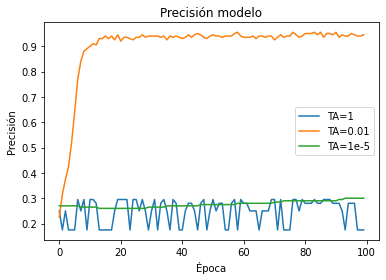

In [ ]:
# Comparamos resultados
plt.plot(history_lr_constant_1.history['val_accuracy'])
plt.plot(history_lr_constant_2.history['val_accuracy'])
plt.plot(history_lr_constant_3.history['val_accuracy'])
plt.title('Exactitud modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['TA=1', 'TA=0.01', 'TA=1e-5'], 
           loc="center right")
plt.show()

Podemos apreciar la importancia de ajustar correctamente la tasa de aprendizaje. Con una tasa de aprendizaje elevada el modelo empieza a oscilar en mínimos locales y no sale de ellos. Con una tasa baja el aprendizaje es muy lento y en 100 epochs no llega a converger.

In [ ]:
# Comparamos distintos optimizadores

# RMSprop
model_rmsprop = get_model()
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_rmsprop.compile(loss="categorical_crossentropy", optimizer=optimizer,
                      metrics=["accuracy"])
history_lr_opt_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=100, 
                                           batch_size=64,
                                           validation_data=(X_val, y_val))


# Adagrad
model_adagrad = get_model()
optimizer = Adagrad(learning_rate=0.01, epsilon=1e-08, decay=0.0)
model_adagrad.compile(loss="categorical_crossentropy", optimizer=optimizer,
                      metrics=["accuracy"])
history_lr_opt_adagrad = model_adagrad.fit(X_train, y_train, epochs=100, 
                                           batch_size=64,
                                           validation_data=(X_val, y_val))

# Adam
model_adam = get_model()
optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_adam.compile(loss="categorical_crossentropy", optimizer=optimizer,
                   metrics=["accuracy"])
history_lr_opt_adam = model_adam.fit(X_train, y_train, epochs=100, 
                                     batch_size=64,
                                     validation_data=(X_val, y_val))

# Adadelta
model_adadelta = get_model()
optimizer = Adadelta(learning_rate=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
model_adadelta.compile(loss="categorical_crossentropy", optimizer=optimizer,
                       metrics=["accuracy"])
history_lr_opt_adadelta = model_adadelta.fit(X_train, y_train, epochs=100, 
                                             batch_size=64,
                                             validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.6293 - accuracy: 0.2700 - val_loss: 1.5587 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4706 - accuracy: 0.2856 - val_loss: 1.4526 - val_accuracy: 0.2850
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3875 - accuracy: 0.3544 - val_loss: 1.3868 - val_accuracy: 0.3250
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3256 - accuracy: 0.3938 - val_loss: 1.3262 - val_accuracy: 0.4150
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2682 - accuracy: 0.4419 - val_loss: 1.2677 - val_accuracy: 0.4700
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2088 - accuracy: 0.4850 - val_loss: 1.2040 - val_accuracy: 0.4800
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1434 - accuracy: 0.5331 - val_loss: 1.1346 - val_accuracy: 0.5100
Epoch 8/100


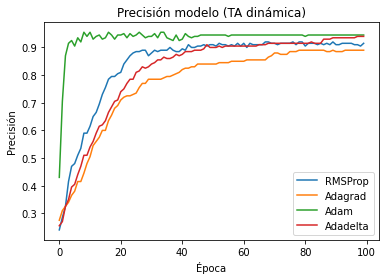

In [ ]:
# Comparamos resultados
plt.plot(history_lr_opt_rmsprop.history['val_accuracy'])
plt.plot(history_lr_opt_adagrad.history['val_accuracy'])
plt.plot(history_lr_opt_adam.history['val_accuracy'])
plt.plot(history_lr_opt_adadelta.history['val_accuracy'])
plt.title('Precisión modelo (TA dinámica)')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['RMSProp', 'Adagrad', 'Adam', 'Adadelta'], 
           loc="lower right")
plt.show()

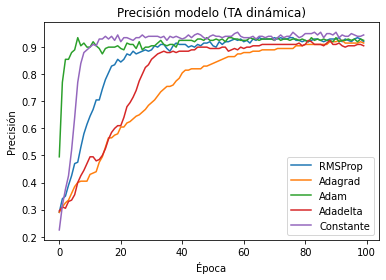

In [ ]:
# Comparamos resultados
plt.plot(history_lr_opt_rmsprop.history['val_accuracy'])
plt.plot(history_lr_opt_adagrad.history['val_accuracy'])
plt.plot(history_lr_opt_adam.history['val_accuracy'])
plt.plot(history_lr_opt_adadelta.history['val_accuracy'])
plt.plot(history_lr_constant_2.history['val_accuracy'])
plt.title('Precisión modelo (TA dinámica)')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['RMSProp', 'Adagrad', 'Adam', 'Adadelta', 'Constante'], 
           loc="lower right")
plt.show()

In [ ]:
# Comparamos resultados en test:
metrics_constant = model_constant_med.evaluate(X_test, y_test, verbose=0)
metrics_rmsprop = model_rmsprop.evaluate(X_test, y_test, verbose=0)
metrics_adagrad = model_adagrad.evaluate(X_test, y_test, verbose=0)
metrics_adam = model_adam.evaluate(X_test, y_test, verbose=0)
metrics_adadelta = model_adadelta.evaluate(X_test, y_test, verbose=0)

print('Precisión RMSProp: ', metrics_rmsprop[1])
print('Precisión Adagrad: ', metrics_adagrad[1])
print('Precisión Adam: ', metrics_adam[1])
print('Precisión Adadelta: ', metrics_adadelta[1])
print('Precisión TA constante: ', metrics_constant[1])

Precisión RMSProp:  0.9549999833106995
Precisión Adagrad:  0.925000011920929
Precisión Adam:  0.9449999928474426
Precisión Adadelta:  0.9399999976158142
Precisión TA constante:  0.9750000238418579


# Ejercicio 5: EarlyStopping

Para emplear la técnica de reularización de EarlyStopping podemos hacer uso de los callbacks de Keras. Estas son funciones que se ejecutan en diferentes etapas del proceso de entrenamiento (e.g. al principio o final de cada época, antes o después de un batch, etc.). El callback de EarlyStopping detiene el entrenamiento cuando una determinada métrica deja de mejorar.


In [ ]:
# Importamos dependencia
from keras.callbacks import EarlyStopping

# Definimos arquitectura
model_earlystopping = get_model()

# Definimos callback EarlyStopping
earlystopping = EarlyStopping(monitor="val_loss", 
                              mode="min", patience=5,  
                              restore_best_weights=True,
                              verbose=1)

# Compilamos
model_earlystopping.compile(loss="categorical_crossentropy", optimizer='adam',
                            metrics=["accuracy"])

# Entrenamos
history_earlystopping = model_earlystopping.fit(X_train, y_train, epochs=100, 
                                                batch_size=64,
                                                callbacks=[earlystopping],          #en el fit, llamamos al callbacks con earlystopping
                                                validation_data=(X_val, y_val))

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.4256 - accuracy: 0.2581 - val_loss: 1.4125 - val_accuracy: 0.2600
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 1.3871 - accuracy: 0.2887 - val_loss: 1.3863 - val_accuracy: 0.2850
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 1.3613 - accuracy: 0.3094 - val_loss: 1.3635 - val_accuracy: 0.3050
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3342 - accuracy: 0.3388 - val_loss: 1.3347 - val_accuracy: 0.3600
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2996 - accuracy: 0.3738 - val_loss: 1.3050 - val_accuracy: 0.3850
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2521 - accuracy: 0.4094 - val_loss: 1.2596 - val_accuracy: 0.4500
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1907 - accuracy: 0.4663 - val_loss: 1.1995 - val_accuracy: 0.4950
Epoch 8/100


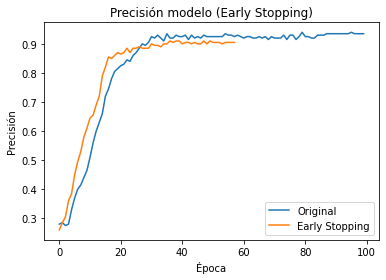

In [ ]:
# Comparamos resultados
plt.plot(history.history['val_accuracy'])
plt.plot(history_earlystopping.history['val_accuracy'])
plt.title('Precisión modelo (Early Stopping)')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Original', 'Early Stopping'], 
           loc="lower right")
plt.show()

# Ejercicio 6: Dropout

Introduce Dropout en las capas ocultas. ((Se podría poner un Dropout diferente en cada cada)) ((ponemos un 25% en todas)).

In [ ]:
from keras.layers.core import Dropout

# Definimos arquitectura
model_dropout = Sequential()
model_dropout.add(Input(shape=(X_train.shape[1],)))
model_dropout.add(Dense(16, activation='relu'))
model_dropout.add(Dropout(0.25))   #porcentaje de neuronas que queremos apagar.
model_dropout.add(Dense(12, activation='relu'))
model_dropout.add(Dropout(0.25))
model_dropout.add(Dense(4, activation='softmax'))

# Compilamos
model_dropout.compile(loss="categorical_crossentropy", optimizer='adam',
                      metrics=["accuracy"])

# Entrenamos
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, batch_size=64,
                                    validation_data=(X_val, y_val))



Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.5172 - accuracy: 0.3050 - val_loss: 1.4756 - val_accuracy: 0.2700
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4558 - accuracy: 0.3013 - val_loss: 1.4233 - val_accuracy: 0.2900
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4263 - accuracy: 0.3100 - val_loss: 1.3846 - val_accuracy: 0.3100
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3704 - accuracy: 0.3344 - val_loss: 1.3588 - val_accuracy: 0.3200
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3520 - accuracy: 0.3619 - val_loss: 1.3286 - val_accuracy: 0.3450
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3438 - accuracy: 0.3444 - val_loss: 1.3004 - val_accuracy: 0.3550
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3185 - accuracy: 0.3631 - val_loss: 1.2695 - val_accuracy: 0.3700
Epoch 8/100


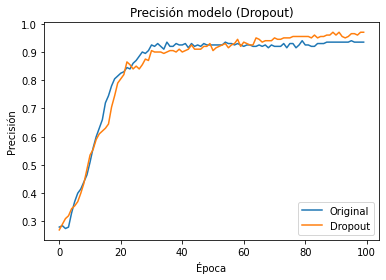

In [ ]:
# Comparamos resultados
plt.plot(history.history['val_accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.title('Precisión modelo (Dropout)')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Original', 'Dropout'], 
           loc="lower right")
plt.show()

# Ejercicio 7: Regularización L1

Introduce regularización L1 a las capas ocultas.

In [ ]:
from keras import regularizers

# Definimos arquitectura
model_l1 = Sequential()
model_l1.add(Input(shape=(X_train.shape[1],)))
model_l1.add(Dense(16, activation='relu', 
                   kernel_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(12, activation='relu',
                   kernel_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(4, activation='softmax'))

# Compilamos
model_l1.compile(loss="categorical_crossentropy", optimizer='adam',
                 metrics=["accuracy"])

# Entrenamos
history_regularizer = model_l1.fit(X_train, y_train, epochs=100, batch_size=64,
                                   validation_data=(X_val, y_val))



Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 2.5685 - accuracy: 0.2637 - val_loss: 2.5720 - val_accuracy: 0.2350
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 2.4116 - accuracy: 0.3144 - val_loss: 2.4174 - val_accuracy: 0.2650
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 2.2910 - accuracy: 0.3569 - val_loss: 2.2943 - val_accuracy: 0.3000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 2.1831 - accuracy: 0.4100 - val_loss: 2.1784 - val_accuracy: 0.3550
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 2.0729 - accuracy: 0.4769 - val_loss: 2.0643 - val_accuracy: 0.4300
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.9578 - accuracy: 0.5325 - val_loss: 1.9412 - val_accuracy: 0.4600
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.8337 - accuracy: 0.5663 - val_loss: 1.8138 - val_accuracy: 0.5100
Epoch 8/100


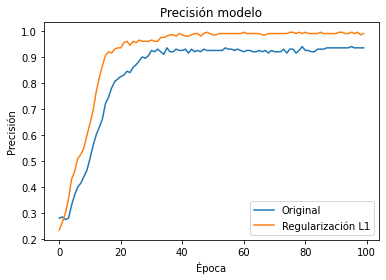

In [ ]:
# Comparamos resultados
plt.plot(history.history['val_accuracy'])
plt.plot(history_regularizer.history['val_accuracy'])
plt.title('Precisión modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Original', 'Regularización L1'], 
           loc="lower right")
plt.show()

# Ejercicio 8: Regularización L2
Introduce regularización L2 a las capas ocultas.

In [ ]:
# Definimos arquitectura
model_l2 = Sequential()
model_l2.add(Input(shape=(X_train.shape[1],)))
model_l2.add(Dense(16, activation='relu', 
                   kernel_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(12, activation='relu',
                   kernel_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(4, activation='softmax'))

# Compilamos
model_l2.compile(loss="categorical_crossentropy", optimizer='adam',
                 metrics=["accuracy"])

# Entrenamos
history_regularizer_l2 = model_l2.fit(X_train, y_train, epochs=100, 
                                      batch_size=64,
                                      validation_data=(X_val, y_val))


Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 1.7549 - accuracy: 0.2519 - val_loss: 1.7465 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 1.6658 - accuracy: 0.2869 - val_loss: 1.6697 - val_accuracy: 0.2800
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.6012 - accuracy: 0.3194 - val_loss: 1.6108 - val_accuracy: 0.2750
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.5454 - accuracy: 0.3638 - val_loss: 1.5523 - val_accuracy: 0.3150
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1.4888 - accuracy: 0.4200 - val_loss: 1.4960 - val_accuracy: 0.3500
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.4256 - accuracy: 0.4538 - val_loss: 1.4297 - val_accuracy: 0.3800
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3555 - accuracy: 0.5006 - val_loss: 1.3655 - val_accuracy: 0.4100
Epoch 8/100


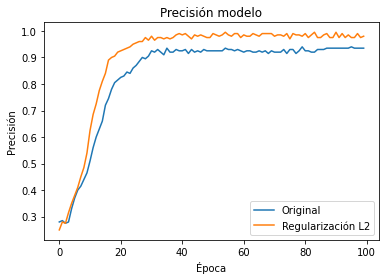

In [ ]:
# Comparamos resultados
plt.plot(history.history['val_accuracy'])
plt.plot(history_regularizer_l2.history['val_accuracy'])
plt.title('Precisión modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Original', 'Regularización L2'], 
           loc="lower right")
plt.show()

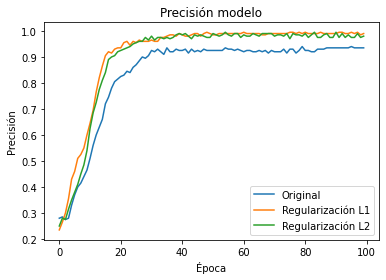

In [ ]:
# Comparamos resultados
plt.plot(history.history['val_accuracy'])
plt.plot(history_regularizer.history['val_accuracy'])
plt.plot(history_regularizer_l2.history['val_accuracy'])
plt.title('Precisión modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Original', 'Regularización L1', 'Regularización L2'], 
           loc="lower right")
plt.show()

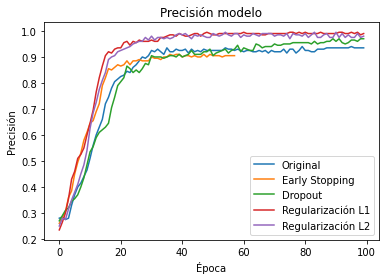

In [ ]:
# Comparamos resultados
plt.plot(history.history['val_accuracy'])
plt.plot(history_earlystopping.history['val_accuracy'])
plt.plot(history_dropout.history['val_accuracy'])
plt.plot(history_regularizer.history['val_accuracy'])
plt.plot(history_regularizer_l2.history['val_accuracy'])
plt.title('Precisión modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Original', 'Early Stopping', 'Dropout', 'Regularización L1', 'Regularización L2' ], 
           loc="lower right")
plt.show()

In [ ]:
# Comparamos resultados en test
metrics_earlystopping = model_earlystopping.evaluate(X_test, y_test, verbose=0)
metrics_dropout = model_dropout.evaluate(X_test, y_test, verbose=0)
metrics_l1 = model_l1.evaluate(X_test, y_test, verbose=0)
metrics_l2 = model_l2.evaluate(X_test, y_test, verbose=0)

print('Test Early Stopping: ', metrics_earlystopping[1])
print('Test Dropout: ', metrics_dropout[1])
print('Test Regularización L1: ', metrics_l1[1])
print('Test Regularización L2: ', metrics_l2[1])

Test Early Stopping:  0.9599999785423279
Test Dropout:  0.9750000238418579
Test Regularización L1:  0.9750000238418579
Test Regularización L2:  0.9800000190734863


# Extra: Selección de hiperparámetros (grid search)
Como hemos visto tanto en la sesión teórica como en la sesión práctica, hay varios hiperparámetros que el desarrollador debe definir a la hora de diseñar la arquitectura. 
Esta búsqueda se basa en la experimentación (prueba y error) de forma que consigamos la configuración que mejor resultados nos de sobre el conjunto de datos de validación.
Existen métodos que facilitan esta búsqueda como "GridSearchCV" de sckit-learn. En este definimos qué parametros queremos probar y, para cada uno de ellos, con qué valores. Una vez definidos, siguiendo una estrategía de validación cruzada, selecciona la mejor configuración.

Pese a ser una buena técnica para buscar hiperparámetros se recomienda acotar lo máximo posible las pruebas a realizar ya que, dependiendo de la complejidad de la arquitectura y el tamaño del dataset, puede resultar computacionalmente costoso.

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier  #keras.wrappers.scikit_learn  deprecated ;-)  pip install scikeras
#from scikeras.wrappers import KerasClassifier    #pip install scikeras


# Método para crear el modelo.
def create_model(optimizer):
  model = Sequential()
  model.add(Input(shape=(X_train.shape[1],)))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(4, activation='softmax'))
  model.compile(loss="categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
  return model

# Define los parámetros a probar
batch_size = [20, 40, 60, 80, 100]
epochs = [10, 50, 100, 150]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam']
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)

# Creamos modelo
model = KerasClassifier(build_fn=create_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_norm, y_onehot)

# Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Best: 0.927495 using {'batch_size': 20, 'epochs': 150, 'optimizer': 'SGD'}
0.528484 (0.035895) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'SGD'}
0.767004 (0.038344) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'RMSprop'}
0.309988 (0.017306) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'Adagrad'}
0.258985 (0.025731) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'Adadelta'}
0.823995 (0.007604) with: {'batch_size': 20, 'epochs': 10, 'optimizer': 'Adam'}
0.892999 (0.002603) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'SGD'}
0.904995 (0.007550) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'RMSprop'}
0.340457 (0.067854) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'Adagrad'}
0.266001 (0.019075) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'Adadelta'}
0.921001 (0.005769) with: {'batch_size': 20, 'epochs': 50, 'optimizer': 'Adam'}
0.918992 (0.011873) with: {'batch_size': 20, 'epochs': 100, 'optimizer': 'SGD'}
0.904996 (0.006219) with: {